# Статистический анализ двух бинарных выборок

## 📊 Условие задачи

### Исходные данные:
- **Две бинарные выборки** с вероятностями успеха:
  - $p_1 = 0.35$ (первая выборка)
  - $p_2 = 0.40$ (вторая выборка)
- **Уровень значимости**: $\alpha = 0.05$ (p-value)
- **Минимальный детектируемый эффект (MDE)**: $\delta = |p_2 - p_1| = 0.05$

### Поставленные задачи:

#### 1. 📈 Определение минимального размера выборки
**Цель**: Найти минимальное количество элементов $n$ в каждой выборке, необходимое для детекции MDE с заданной мощностью теста ($1 - \beta = 0.8$).

**Формула для расчета**:
$$
n = \frac{(z_{1-\alpha/2} \cdot \sqrt{2 \cdot \bar{p} \cdot (1-\bar{p})} + z_{1-\beta} \cdot \sqrt{p_1(1-p_1) + p_2(1-p_2)})^2}{(p_1 - p_2)^2}
$$

где:
- $\bar{p} = \frac{p_1 + p_2}{2}$ - объединенная пропорция
- $z_{1-\alpha/2}$ - квантиль нормального распределения для двустороннего теста
- $z_{1-\beta}$ - квантиль нормального распределения для мощности теста

#### 2. 🔄 Преобразование распределений через ЦПТ
**Цель**: Используя Центральную Предельную Теорему (ЦПТ), преобразовать биномиальные распределения к нормальным.

**Формулы преобразования**:
- Для выборки размера $n$ с вероятностью $p$:
  $$
  \text{Среднее: } \mu = p
  $$
  $$
  \text{Стандартное отклонение: } \sigma = \sqrt{\frac{p(1-p)}{n}}
  $$
- Получаем нормальные распределения:
  - Первая выборка: $N(\mu_1, \sigma_1)$
  - Вторая выборка: $N(\mu_2, \sigma_2)$

#### 3. 📊 Визуализация распределений и ошибок
**Требуется построить два графика**:

**График 1**: Двусторонняя альтернатива
- Распределения обеих выборок
- Критические области для ошибки I рода ($\alpha$)
- Область ошибки II рода ($\beta$)

**График 2**: Односторонняя альтернатива ($p_1 > p_2$)
- Распределения обеих выборок  
- Односторонние критические области
- Соответствующие области ошибок

**Обозначения на графиках**:
- 🟦 **Синяя область** - Ошибка I рода (вероятность $\alpha$)
- 🟥 **Красная область** - Ошибка II рода (вероятность $\beta$)
- 📍 **Вертикальные линии** - Критические значения и средние

#### 4. 📐 Расчет доверительных интервалов
**Цель**: Построить $95\%$ доверительные интервалы для средних значений обеих выборок.

**Формула доверительного интервала**:
$$
CI = \hat{p} \pm z_{1-\alpha/2} \cdot \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}
$$

где:
- $\hat{p}$ - выборочная пропорция
- $z_{1-\alpha/2}$ - квантиль стандартного нормального распределения

### 🎯 Ожидаемые результаты:

1. **Числовой результат**: Минимальный размер выборки $n$
2. **Параметры распределений**: $\mu_1, \sigma_1, \mu_2, \sigma_2$
3. **Визуализация**: Два графика с областями статистических ошибок
4. **Интервальные оценки**: Доверительные интервалы для $p_1$ и $p_2$

### 📈 Статистические гипотезы:

**Для двустороннего теста**:
$$
H_0: p_1 = p_2 \\
H_1: p_1 \neq p_2
$$

**Для одностороннего теста**:
$$
H_0: p_1 \leq p_2 \\
H_1: p_1 > p_2
$$


АНАЛИЗ ДВУХ БИНАРНЫХ ВЫБОРОК (С НЕРАВНЫМИ РАЗМЕРАМИ)

Вероятность в группе 1: 0.35
Вероятность в группе 2: 0.4
Уровень значимости (p-value): 0.05
Мощность теста: 0.8
------------------------------------------------------------
1. МИНИМАЛЬНЫЙ РАЗМЕР ВЫБОРКИ (РАВНЫЕ ГРУППЫ):

   n₁ = n₂ = 1471 элементов в каждой группе

2. ПРЕОБРАЗОВАНИЕ ЧЕРЕЗ ЦПТ:

   РАВНЫЕ ВЫБОРКИ (n=1471):

     Группа 1: N(μ=0.3500, σ=0.0124)
     Группа 2: N(μ=0.4000, σ=0.0128)

   НЕРАВНЫЕ ВЫБОРКИ (n₁=735, n₂=7350):

     Группа 1: N(μ=0.3500, σ=0.0176)
     Группа 2: N(μ=0.4000, σ=0.0057)

3 ВИЗУАЛИЗАЦИЯ РАСПРЕДЕЛЕНИЙ И ОШИБОК



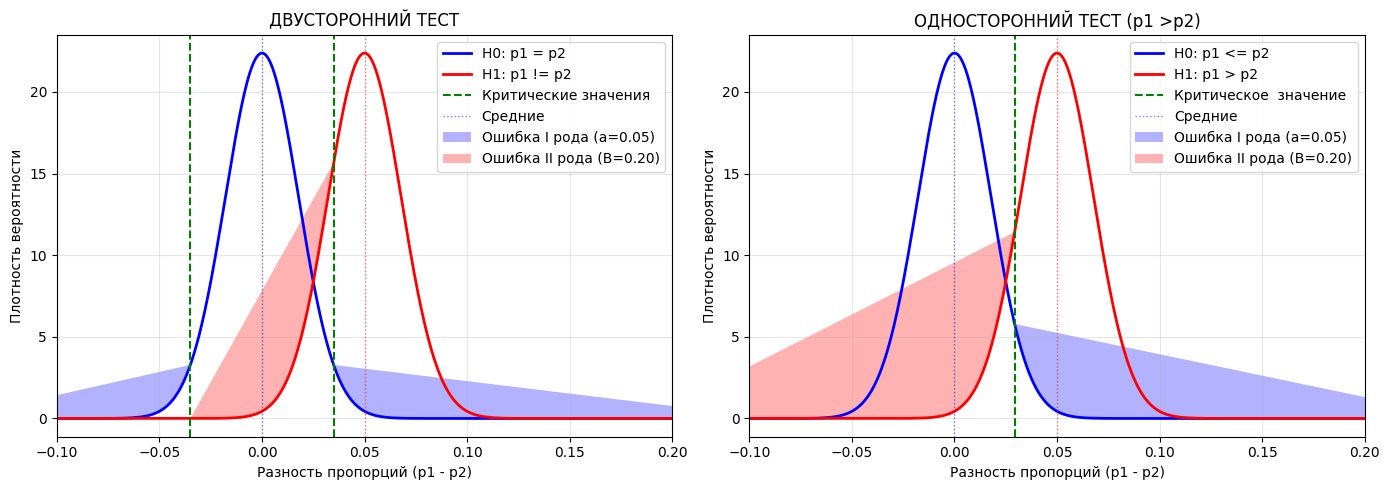


4 Доверительны интервалы (уровень доверия 0.95):

   РАВНЫЕ ВЫБОРКИ:

     Группа 1: [0.3256, 0.3744] (ширина: 0.0487)
     Группа 2: [0.3750, 0.4250] (ширина: 0.0501)

   НЕРАВНЫЕ ВЫБОРКИ:
     Группа 1: [0.3155, 0.3845] (ширина: 0.0690)
     Группа 2: [0.3888, 0.4112] (ширина: 0.0224)



In [9]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

# Исходные данные
p1 = 0.35
p2 = 0.40
alpha = 0.05
power = 0.8

# Расчёт
delta = abs(p2 - p1)
p_bar = (p1 + p2) / 2
# Критические значения
z_alpha_2 = stats.norm.ppf(1 - alpha/2)
z_power = stats.norm.ppf(power)
# Минимальный размер выборки
term1 = z_alpha_2 * np.sqrt(2 * p_bar * (1 - p_bar))
term2 = z_power * np.sqrt(p1*(1-p1) + p2*(1-p2))
n = int(np.ceil(((term1 + term2)**2) / (delta**2)))
# Равные выборки
sigma1_equal = np.sqrt(p1*(1-p1)/n)
sigma2_equal = np.sqrt(p2*(1-p2)/n)
# Неравные выборки (пример)
n1_unequal = n // 2
n2_unequal = n1_unequal * 10
sigma1_unequal = np.sqrt(p1*(1-p1)/n1_unequal)
sigma2_unequal = np.sqrt(p2*(1-p2)/n2_unequal)
# Доверительные интервалы (95%)
z_ci = stats.norm.ppf(0.975)
# Равные выборки
ci1_lower_equal = p1 - z_ci * sigma1_equal
ci1_upper_equal = p1 + z_ci * sigma1_equal
ci2_lower_equal = p2 - z_ci * sigma2_equal
ci2_upper_equal = p2 + z_ci * sigma2_equal

# Неравные выборки
ci1_lower_unequal = p1 - z_ci * sigma1_unequal
ci1_upper_unequal = p1 + z_ci * sigma1_unequal
ci2_lower_unequal = p2 - z_ci * sigma2_unequal
ci2_upper_unequal = p2 + z_ci * sigma2_unequal

result = f"""
============================================================
АНАЛИЗ ДВУХ БИНАРНЫХ ВЫБОРОК (С НЕРАВНЫМИ РАЗМЕРАМИ)
============================================================

Вероятность в группе 1: {p1}
Вероятность в группе 2: {p2}
Уровень значимости (p-value): {alpha}
Мощность теста: {power}
------------------------------------------------------------
1. МИНИМАЛЬНЫЙ РАЗМЕР ВЫБОРКИ (РАВНЫЕ ГРУППЫ):

   n₁ = n₂ = {n} элементов в каждой группе

2. ПРЕОБРАЗОВАНИЕ ЧЕРЕЗ ЦПТ:

   РАВНЫЕ ВЫБОРКИ (n={n}):

     Группа 1: N(μ={p1:.4f}, σ={sigma1_equal:.4f})
     Группа 2: N(μ={p2:.4f}, σ={sigma2_equal:.4f})

   НЕРАВНЫЕ ВЫБОРКИ (n₁={n1_unequal}, n₂={n2_unequal}):

     Группа 1: N(μ={p1:.4f}, σ={sigma1_unequal:.4f})
     Группа 2: N(μ={p2:.4f}, σ={sigma2_unequal:.4f})

3 ВИЗУАЛИЗАЦИЯ РАСПРЕДЕЛЕНИЙ И ОШИБОК
"""
print(result)

# Визуализациия
# Параметры для графиков
se = np.sqrt(p1*(1-p1)/n + p2*(1-p2)/n)  # Стандартная ошибка разности
x = np.linspace(-0.15, 0.25, 1000)
# Распределения под гипотезами
h0_dist = stats.norm(loc=0, scale=se)      # H0: разность = 0
h1_dist = stats.norm(loc=delta, scale=se)  # H1: разность = дельте

# Создаём графики
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# График 1: Двусторонняя альтернатива
ax1 = axes[0]
# Распределения
ax1.plot(x, h0_dist.pdf(x), 'b-', linewidth=2, label='H0: p1 = p2')
ax1.plot(x, h1_dist.pdf(x), 'r-', linewidth=2, label='H1: p1 != p2')
# Критические значения (двусторонние)
crit_left = h0_dist.ppf(alpha/2)
crit_right = h0_dist.ppf(1 - alpha/2)
# Вертикальные линии
ax1.axvline(crit_left, color='green', linestyle='--', linewidth=1.5, label='Критические значения')
ax1.axvline(crit_right, color='green', linestyle='--', linewidth=1.5)
ax1.axvline(0, color='blue', linestyle=':', linewidth=1, alpha=0.5, label='Средние')
ax1.axvline(delta, color='red', linestyle=':', linewidth=1, alpha=0.5)
# Область ошибки I рода 
x_alpha_left = np.linspace(-0.15, crit_left, 100)
x_alpha_right = np.linspace(crit_right, 0.25, 100)

alpha_poly_left = Polygon(np.column_stack([x_alpha_left, h0_dist.pdf(x_alpha_left)]),
                         closed=True, facecolor='blue', alpha=0.3, label=f'Ошибка I рода (a={alpha})')
alpha_poly_right = Polygon(np.column_stack([x_alpha_right, h0_dist.pdf(x_alpha_right)]),
                          closed=True, facecolor='blue', alpha=0.3)
# Область ошибки II рода 
x_beta = np.linspace(crit_left, crit_right, 500)
beta_poly = Polygon(np.column_stack([x_beta, h1_dist.pdf(x_beta)]),
                   closed=True, facecolor='red', alpha=0.3, label=f'Ошибка II рода (B={1-power:.2f})')

ax1.add_patch(alpha_poly_left)
ax1.add_patch(alpha_poly_right)
ax1.add_patch(beta_poly)
ax1.set_xlabel('Разность пропорций (p1 - p2)')
ax1.set_ylabel('Плотность вероятности')
ax1.set_title('ДВУСТОРОННИЙ ТЕСТ')
ax1.legend(loc='upper right')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(-0.1, 0.2)

# График 2: Односторонняя альтернатива
ax2 = axes[1]
# Распределения
ax2.plot(x, h0_dist.pdf(x), 'b-', linewidth=2, label='H0: p1 <= p2')
ax2.plot(x, h1_dist.pdf(x), 'r-', linewidth=2, label='H1: p1 > p2')
# Критическое значение (одностороннее)
crit_one = h0_dist.ppf(1 - alpha)

# Вертикальные линии
ax2.axvline(crit_one, color='green', linestyle='--', linewidth=1.5, label='Критическое  значение')
ax2.axvline(0, color='blue', linestyle=':', linewidth=1, alpha=0.5, label='Средние')
ax2.axvline(delta, color='red', linestyle=':', linewidth=1, alpha=0.5)
# Область ошибки I рода 
x_alpha_one = np.linspace(crit_one, 0.25, 100)
alpha_poly_one = Polygon(np.column_stack([x_alpha_one, h0_dist.pdf(x_alpha_one)]),
                        closed=True, facecolor='blue', alpha=0.3, label=f'Ошибка I рода (a={alpha})')

# Область ошибки II рода
x_beta_one = np.linspace(-0.15, crit_one, 500)
beta_poly_one = Polygon(np.column_stack([x_beta_one, h1_dist.pdf(x_beta_one)]),
                       closed=True, facecolor='red', alpha=0.3, label=f'Ошибка II рода (B={1-power:.2f})')
ax2.add_patch(alpha_poly_one)
ax2.add_patch(beta_poly_one)
ax2.set_xlabel('Разность пропорций (p1 - p2)')
ax2.set_ylabel('Плотность вероятности')
ax2.set_title('ОДНОСТОРОННИЙ ТЕСТ (p1 >p2)')
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(-0.1, 0.2)

plt.tight_layout()
plt.show()

# ==================== ПРОДОЛЖЕНИЕ ВЫВОДА ====================
result_continuation = f"""
4 Доверительны интервалы (уровень доверия 0.95):

   РАВНЫЕ ВЫБОРКИ:

     Группа 1: [{ci1_lower_equal:.4f}, {ci1_upper_equal:.4f}] (ширина: {ci1_upper_equal - ci1_lower_equal:.4f})
     Группа 2: [{ci2_lower_equal:.4f}, {ci2_upper_equal:.4f}] (ширина: {ci2_upper_equal - ci2_lower_equal:.4f})

   НЕРАВНЫЕ ВЫБОРКИ:
     Группа 1: [{ci1_lower_unequal:.4f}, {ci1_upper_unequal:.4f}] (ширина: {ci1_upper_unequal - ci1_lower_unequal:.4f})
     Группа 2: [{ci2_lower_unequal:.4f}, {ci2_upper_unequal:.4f}] (ширина: {ci2_upper_unequal - ci2_lower_unequal:.4f})
"""
print(result_continuation)